In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\TULASI KATTEL\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
# Import libaries
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1848678667.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
pip install openpyxl



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\TULASI KATTEL\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
#Import the dataset
customerseg = pd.read_excel('Online Retail.xlsx', engine="openpyxl")
customerseg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# EXPLORATORY DATA ANALYSIS
customerseg.describe(include='all')

C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1511599867.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customerseg.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [7]:
customerseg['InvoiceDate'] = pd.to_datetime(customerseg['InvoiceDate'])
customerseg['Year'] = customerseg['InvoiceDate'].apply(lambda x : x.year)
customerseg['Month'] = customerseg['InvoiceDate'].apply(lambda x : x.month)
customerseg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [8]:
customerseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int64         
 9   Month        541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 41.3+ MB


In [9]:
#Checking for negative values 
print(customerseg["Quantity"].min())
print(customerseg["UnitPrice"].min())

-80995
-11062.06


In [10]:
#Deleting return data
customerseg = customerseg.loc[customerseg["Quantity"] >0 ]
customerseg = customerseg.loc[customerseg["UnitPrice"] >0 ]
customerseg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12


In [11]:
print(customerseg["Quantity"].min())
print(customerseg["UnitPrice"].min())

1
0.001


In [13]:
invoicecount = customerseg['InvoiceNo'].value_counts()
invoicecount

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
574320       1
539081       1
574324       1
566009       1
570725       1
Name: InvoiceNo, Length: 19960, dtype: int64

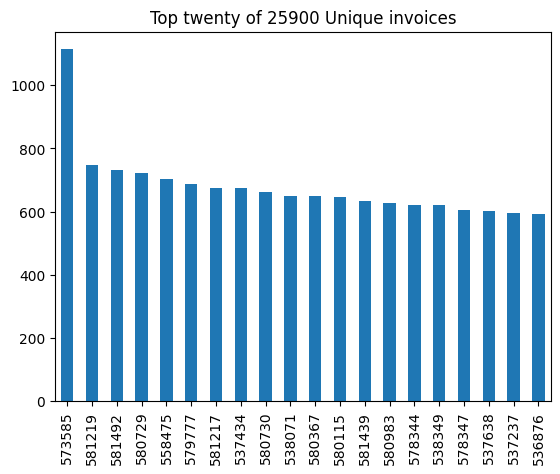

In [14]:
invoicecount[0:20].plot(kind = 'bar')
plt.title("Top twenty of 25900 Unique invoices")
plt.show()
#This shows that this guys may not have the highest number of orders but they are recurring(Meaning they ordered different products)

C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\3945062464.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items.index.astype(str), y=items.values, palette=sns.color_palette("dark:b"))
C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\3945062464.py:8: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=items.index.astype(str), y=items.values, palette=sns.color_palette("dark:b"))


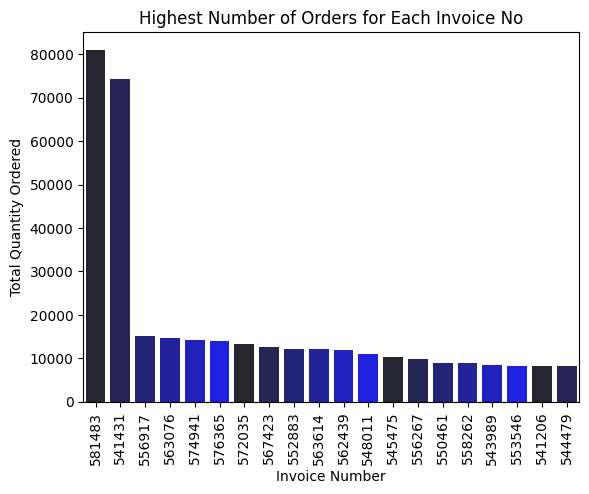

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by InvoiceNo and sum up the Quantity, then get the top 20
items = customerseg.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False)[:20]

# Convert Invoice numbers to string for better visualization
sns.barplot(x=items.index.astype(str), y=items.values, palette=sns.color_palette("dark:b"))

# Formatting the plot
plt.title("Highest Number of Orders for Each Invoice No")
plt.xticks(rotation=90)  # Rotate for better readability
plt.xlabel("Invoice Number")
plt.ylabel("Total Quantity Ordered")

# Show the plot
plt.show()


C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\3762001569.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=databycountry.index.astype(str), y=databycountry.values, palette=sns.color_palette("dark:b"))
C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\3762001569.py:8: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=databycountry.index.astype(str), y=databycountry.values, palette=sns.color_palette("dark:b"))


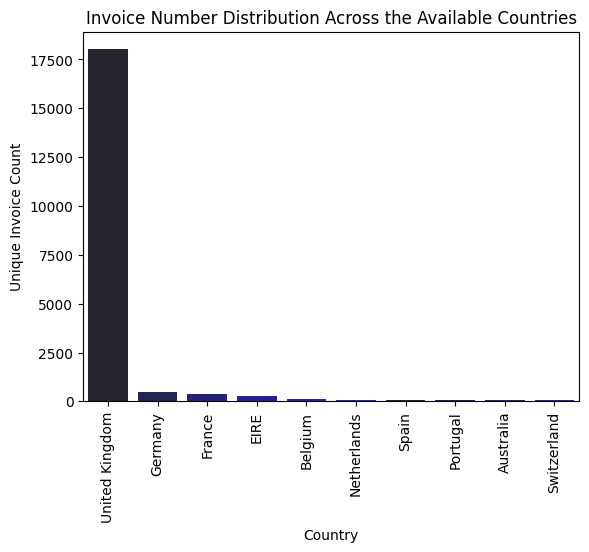

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Country and count unique InvoiceNo, then get the top 10
databycountry = customerseg.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

# Convert index to string for better visualization
sns.barplot(x=databycountry.index.astype(str), y=databycountry.values, palette=sns.color_palette("dark:b"))

# Formatting the plot
plt.title("Invoice Number Distribution Across the Available Countries")
plt.xticks(rotation=90)  # Rotate for better readability
plt.xlabel("Country")
plt.ylabel("Unique Invoice Count")

# Show the plot
plt.show()


C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1551667768.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items.index.astype(str), y=items.values, palette=sns.color_palette("dark:b"))
C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1551667768.py:8: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=items.index.astype(str), y=items.values, palette=sns.color_palette("dark:b"))


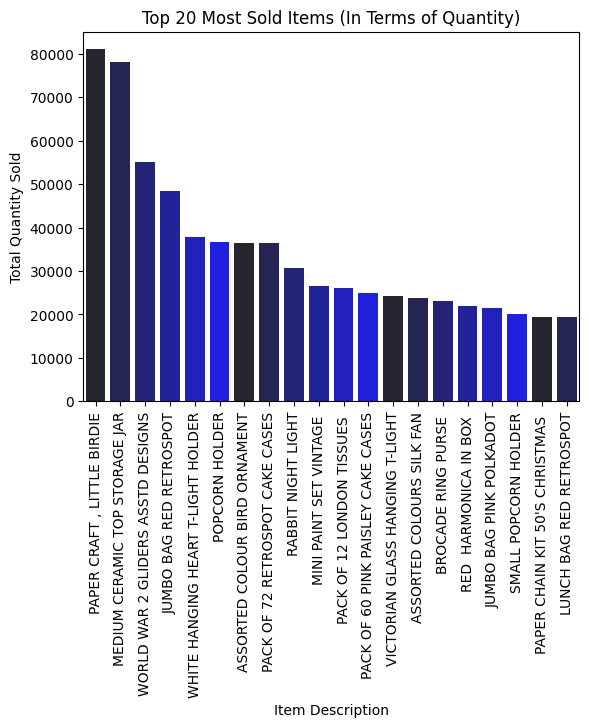

In [20]:


import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Description' and sum up 'Quantity', then get the top 20
items = customerseg.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:20]

# Convert index to string for proper visualization
sns.barplot(x=items.index.astype(str), y=items.values, palette=sns.color_palette("dark:b"))

# Formatting the plot
plt.title("Top 20 Most Sold Items (In Terms of Quantity)")
plt.xticks(rotation=90)  # Rotate for better readability
plt.xlabel("Item Description")
plt.ylabel("Total Quantity Sold")

# Show the plot
plt.show()


C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1776436677.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index.astype(str), y=item_counts.values, palette=sns.color_palette("dark:b"))
C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1776436677.py:8: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=item_counts.index.astype(str), y=item_counts.values, palette=sns.color_palette("dark:b"))


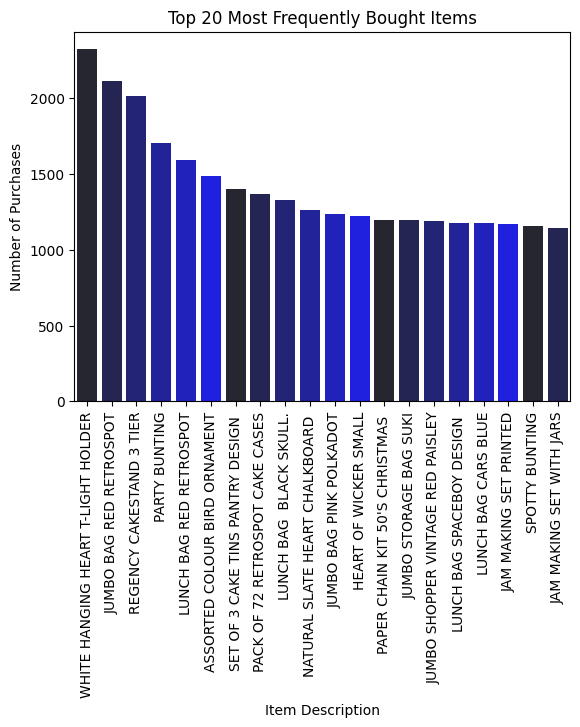

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 20 most frequently bought items
item_counts = customerseg['Description'].value_counts().sort_values(ascending=False).head(20)

# Convert index to string for proper visualization
sns.barplot(x=item_counts.index.astype(str), y=item_counts.values, palette=sns.color_palette("dark:b"))

# Formatting the plot
plt.title("Top 20 Most Frequently Bought Items")
plt.ylabel("Number of Purchases")
plt.xlabel("Item Description")
plt.xticks(rotation=90)  # Rotate for better readability

# Show the plot
plt.show()



In [24]:
customerseg['Sales'] = customerseg['Quantity'] * customerseg['UnitPrice']

C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1717286596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=sns.color_palette("dark:b"))
C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\1717286596.py:8: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=sns.color_palette("dark:b"))


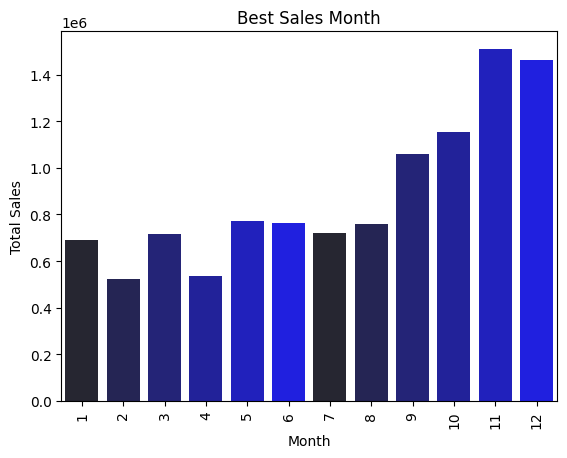

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for rows where 'Sales' is greater than 0, then group by 'Month' and sum the sales
sales_per_month = customerseg[customerseg['Sales'] > 0].groupby('Month')['Sales'].sum().sort_values(ascending=False)

# Plot the data
sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=sns.color_palette("dark:b"))

# Formatting the plot
plt.title("Best Sales Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)  # Rotate for better readability

# Show the plot
plt.show()


           Country        Sales
36  United Kingdom  9025222.084
24     Netherlands   285446.340
10            EIRE   283453.960
14         Germany   228867.140
13          France   209715.110
0        Australia   138521.310
31           Spain    61577.110
33     Switzerland    57089.900
3          Belgium    41196.340
32          Sweden    38378.330
Axes(0.125,0.11;0.775x0.77)


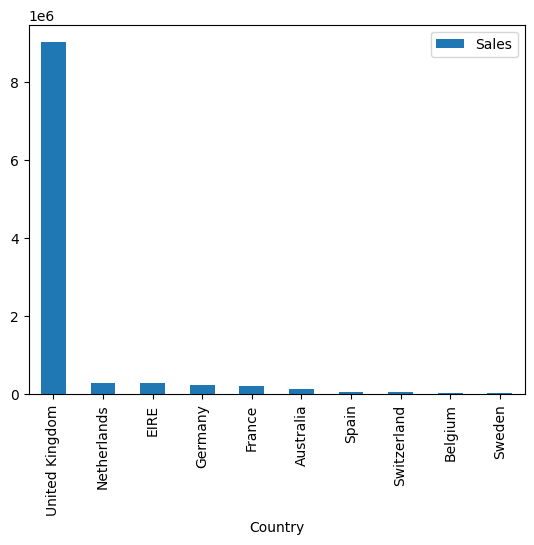

In [27]:
data_temp = customerseg.groupby(['Country'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False).head(10)
print(data_temp)
print(data_temp.plot(x='Country', y='Sales',kind='bar'))

In [28]:
# Customer who spent the most
customerseg.groupby("InvoiceNo").agg({"Sales": "sum"}).sort_values(by = "Sales", ascending = False).head()

,Sales
InvoiceNo,
581483,168469.60
541431,77183.60
574941,52940.94
576365,50653.91
556444,38970.00


In [29]:
customerseg.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False,False,False,False


In [30]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      customerseg.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
Year                0
Month               0
Sales               0
dtype: int64


In [31]:
print(customerseg.duplicated().sum())

5226


In [33]:
customerseg = customerseg.drop_duplicates()
customerseg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60


In [45]:
#What is the general sales trend
general_trend_months= customerseg.groupby("InvoiceDate")["Sales"].sum()
general_trend_months = pd.DataFrame(general_trend)
general_trend_months

,Sales
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 08:45:00,855.86
...,...
2011-12-09 12:23:00,124.60
2011-12-09 12:25:00,140.64
2011-12-09 12:31:00,329.05


In [46]:
dates = []
dates.append(pd.to_datetime("201012",format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month),format="%Y%m") for month in range(1,12)]

In [47]:
general_trend_months

,Sales
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 08:45:00,855.86
...,...
2011-12-09 12:23:00,124.60
2011-12-09 12:25:00,140.64
2011-12-09 12:31:00,329.05


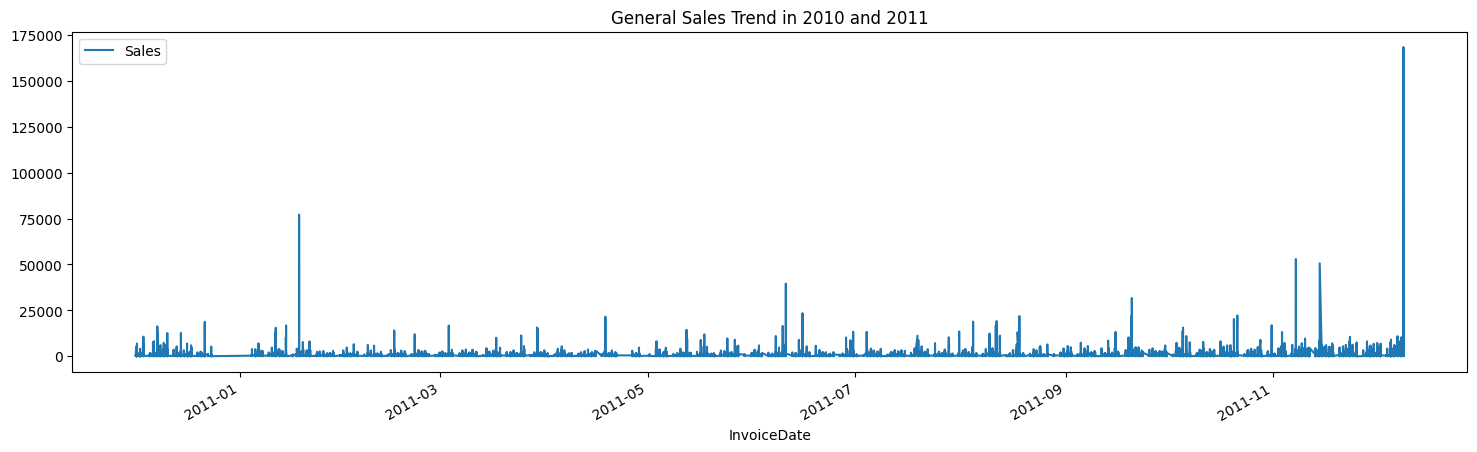

In [48]:
general_trend_months.plot(kind = 'line', figsize=(18,5))
plt.title("General Sales Trend in 2010 and 2011")
plt.show()

In [49]:
# Best Selling Product for each Country
sum_total_price_products = pd.DataFrame(customerseg.groupby(["Country","Description"])["Sales"].sum())
best_selling_product = pd.DataFrame(data=sum_total_price_products.groupby(["Country"])['Sales'].idxmax().values.tolist(),columns =['Country', 'Best Selling Product'])

max_sales = sum_total_price_products.groupby("Country")["Sales"].max().values.tolist()
best_selling_product["MaxSales"] = max_sales

total_sales = sum_total_price_products.groupby("Country")["Sales"].sum().values.tolist() 
best_selling_product["Total sales"] = total_sales

best_selling_product["% of country sales"] = best_selling_product["MaxSales"]/best_selling_product["Total sales"]

In [50]:
best_selling_product \
.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True), \
 subset=["% of country sales"]) \
.format({"% of country sales":"{:.2%}",
         "Sales":"£{:,.0f}",
         "Country total sales":"£{:,.0f}"})

,Country,Best Selling Product,MaxSales,Total sales,% of country sales
0,Australia,RABBIT NIGHT LIGHT,3375.840000,138453.810000,2.44%
1,Austria,POSTAGE,1456.000000,10198.680000,14.28%
2,Bahrain,OCEAN SCENT CANDLE IN JEWELLED BOX,231.240000,754.140000,30.66%
3,Belgium,POSTAGE,4269.000000,41196.340000,10.36%
4,Brazil,REGENCY CAKESTAND 3 TIER,175.200000,1143.600000,15.32%
5,Canada,POSTAGE,550.940000,3666.380000,15.03%
6,Channel Islands,REGENCY CAKESTAND 3 TIER,517.800000,20440.540000,2.53%
7,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,580.000000,13502.850000,4.30%
8,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,70.800000,826.740000,8.56%
9,Denmark,POSTAGE,744.000000,18955.340000,3.93%


In [52]:
# General sales for each months per country
general_trend_country = pd.DataFrame(data={'Date':pd.to_datetime(customerseg.InvoiceDate),
                                   'Country':customerseg.Country,
                                  'Total price':customerseg.Sales})
general_trend_country = general_trend_country.groupby([general_trend_country.Date.dt.to_period("M"),general_trend_country.Country]).sum()
general_trend_country = pd.DataFrame(general_trend_country).reset_index()

C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\2761842346.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  general_trend_country = general_trend_country.groupby([general_trend_country.Date.dt.to_period("M"),general_trend_country.Country]).sum()


In [53]:
general_trend_country.groupby([general_trend_country.Country]).sum().sort_values(by='Total price',ascending=False).head(10)

C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\828238582.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  general_trend_country.groupby([general_trend_country.Country]).sum().sort_values(by='Total price',ascending=False).head(10)


,Total price
Country,
United Kingdom,9001744.094
Netherlands,285446.340
EIRE,283140.520
Germany,228678.400
France,209625.370
Australia,138453.810
Spain,61558.560
Switzerland,57067.600
Belgium,41196.340


In [54]:
general_trend_country.Date = general_trend_country.Date.dt.to_timestamp()

In [56]:
# When do customers tend to purchase products?
df_temp = customerseg.groupby([customerseg.CustomerID,customerseg.InvoiceDate]).Quantity.sum()
df_temp = pd.DataFrame(df_temp).reset_index()

In [57]:
df_temp["Hour"]= df_temp["InvoiceDate"].dt.hour
df_temp["Month"]= df_temp["InvoiceDate"].dt.to_period('M')

In [58]:
count_hours = pd.DataFrame(columns=range(1,25))
count_hours["Month"] = ""

for month in sorted(df_temp["Month"].unique()):
    row = []
    for hour in range(1,25):
        freq = len(df_temp[(df_temp["Month"]==month)&(df_temp["Hour"]==hour)])
        row.append(float(freq))
    row.append(month)
    count_hours.loc[len(count_hours)] = row
         
count_hours = count_hours.set_index("Month") 

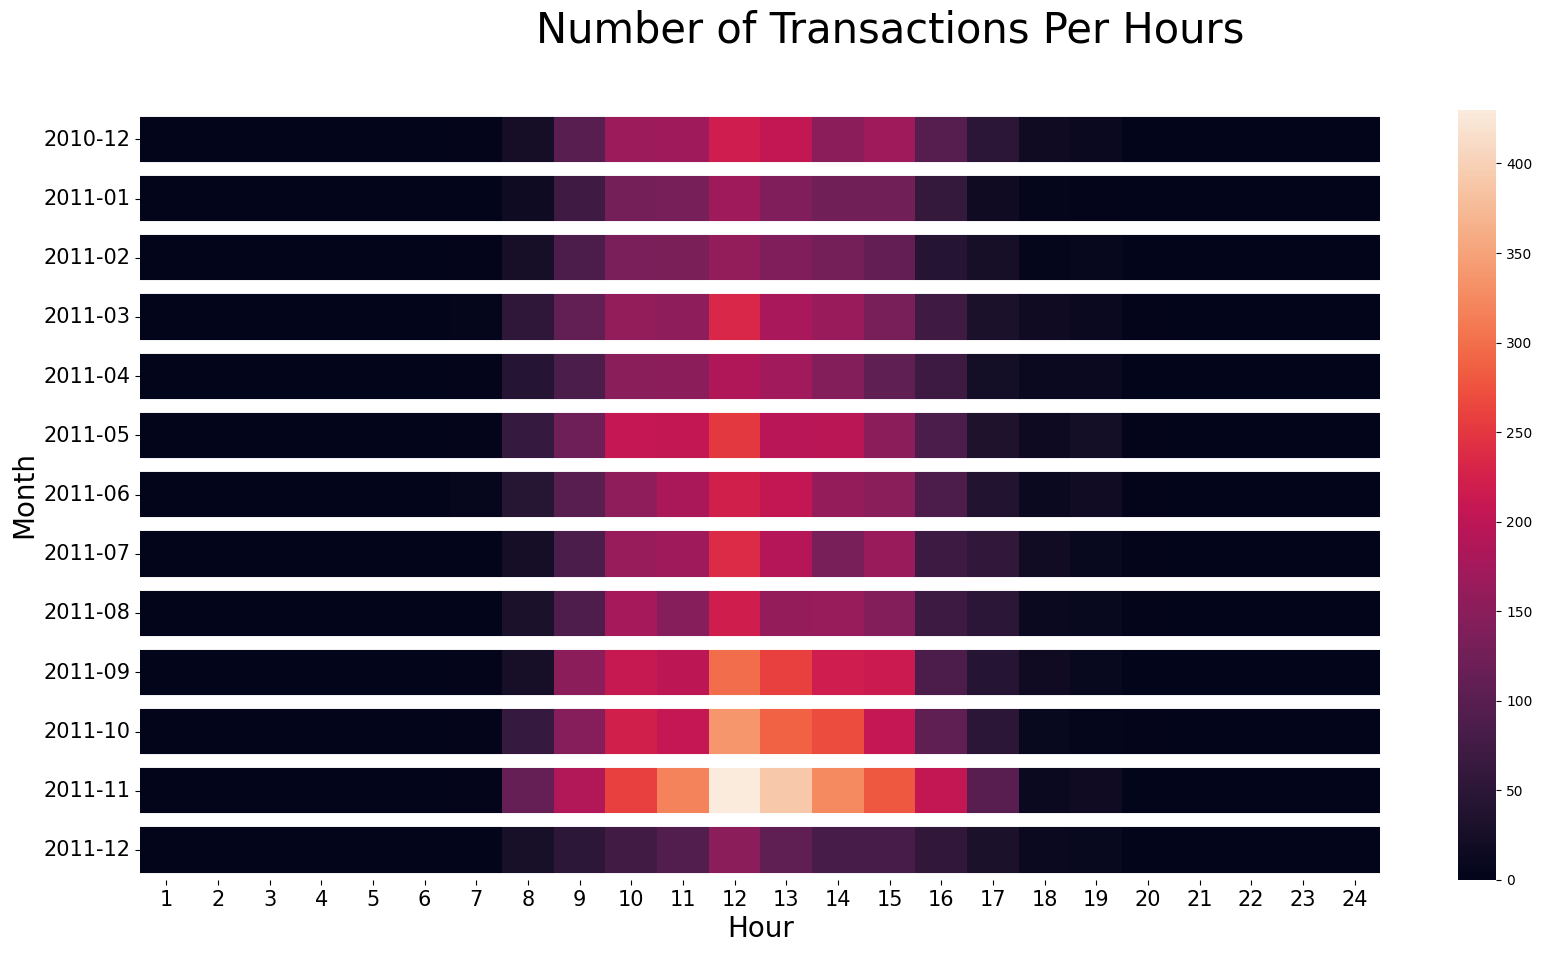

In [59]:
fig  = plt.figure(figsize = (20,10)).suptitle('Number of Transactions Per Hours', fontsize=30)
heatmap = sns.heatmap(data=count_hours)
plt.yticks(rotation=0,size=15)
plt.xticks(size=15)
heatmap.set_xlabel("Hour",fontsize=20)
heatmap.set_ylabel("Month",fontsize=20)
for i in range(count_hours.shape[1] + 1):
    plt.axhline(i, color='white', lw=10
               )

plt.show()

In [62]:
# RFM(Recency, Frequency, Monetary)ANALYSIS
customerseg['Date'] = customerseg['InvoiceDate'].apply(lambda x: x.date())
customerseg.head()

C:\Users\TULASI KATTEL\AppData\Local\Temp\ipykernel_55768\2567851354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerseg['Date'] = customerseg['InvoiceDate'].apply(lambda x: x.date())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12-01


In [63]:
import datetime as dt
today_date = dt.datetime(2011, 12, 1)

In [64]:
rfm = customerseg.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'Sales' : lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [65]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [66]:
seg_map = {
    r'[1-2][1-2]': 'Lost Customer',
    r'[1-2][3-4]': 'Lost Customer',
    r'[1-2]5': 'About to lose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'Retained customers'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,316,1,77183.60,1,1,5,11,Lost Customer
1,12347.0,-7,7,4310.00,5,5,5,55,Retained customers
2,12348.0,66,4,1797.24,2,4,4,24,Lost Customer
3,12349.0,9,1,1757.55,4,1,4,41,promising
4,12350.0,301,1,334.40,1,1,2,11,Lost Customer


In [67]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(15)

,segment,count
0,About to lose,63
1,Lost Customer,1664
2,Retained customers,633
3,about_to_sleep,352
4,loyal_customers,819
5,need_attention,187
6,new_customers,42
7,potential_loyalists,484
8,promising,94


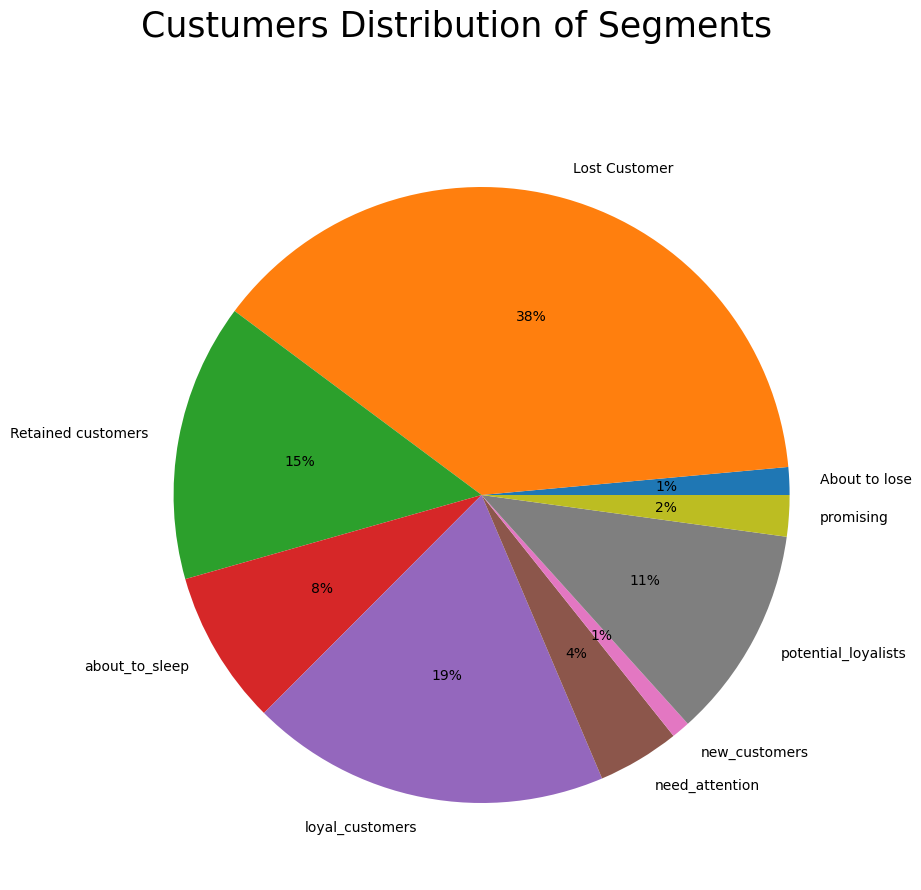

In [68]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [71]:
# CLUSTERING

df_clustering = customerseg.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : 'nunique',
                                     'Sales' : 'sum'})

df_clustering.columns = ['recency', 'frequency', 'monetary']

In [72]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])
df_scaled["CustomerID"] = df_clustering.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

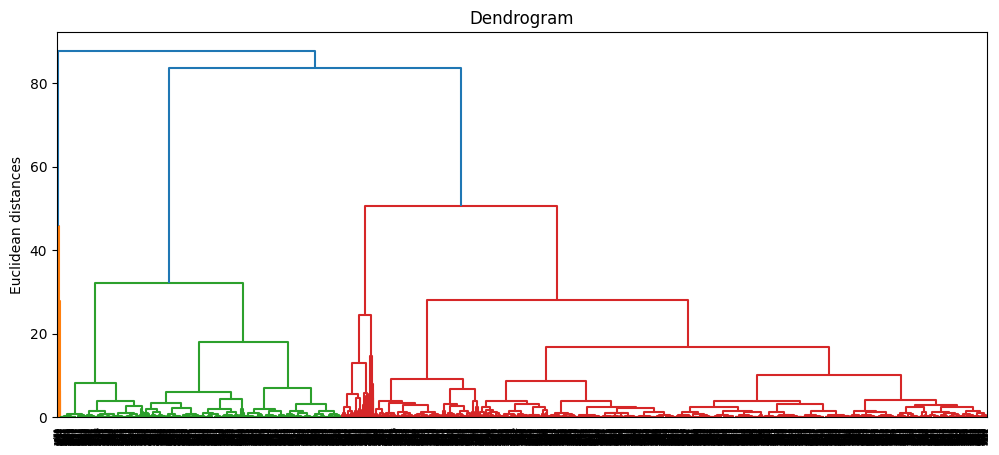

In [73]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()  

In [74]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,recency,frequency,monetary
0,-0.512290,0.052723,-0.021952
1,1.540617,-0.349559,-0.157917
2,-0.865973,8.074597,9.324975


In [75]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [76]:
df_kmeans = df_clustering.copy()
df_kmeans['labels'] = df_labels['labels'].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


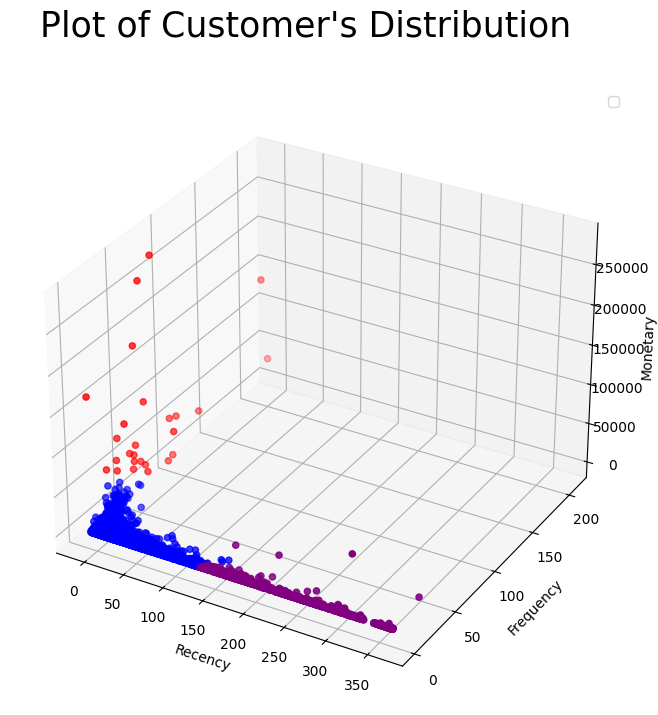

In [77]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (10,8)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["monetary"], marker='o', c=colors[df_kmeans["labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

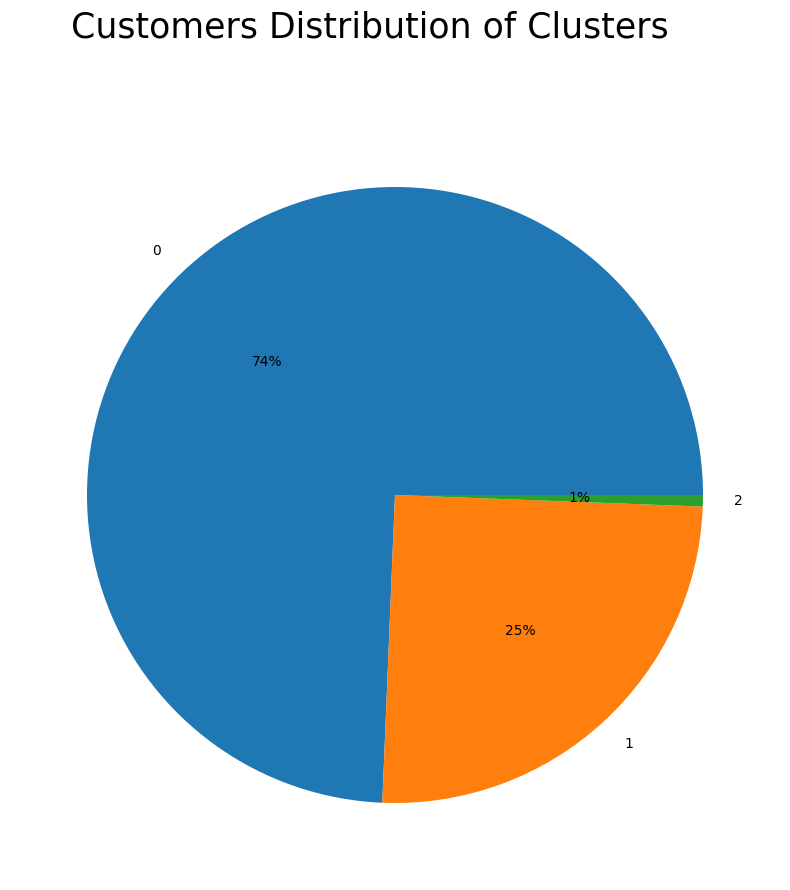

In [78]:
df_kmeans = df_kmeans.reset_index()
clusters_count = df_kmeans.groupby("labels").agg({"CustomerID": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['cluster', 'count']

fig  = plt.figure(figsize = (20,10)).suptitle('Customers Distribution of Clusters', fontsize=25)
plt.pie(clusters_count["count"], labels = clusters_count["cluster"], autopct='%.0f%%')

plt.show()
